### PULA TECHNICAL ASSESSMENT
The purpose of this exercise is threefold:
  1. Analyze the provided data and construct a model.
  2. Systematically document your approach and methodology, ensuring that it's comprehensible for both a fellow candidate and a senior analyst.
  3. Critically evaluate the methods employed and the resulting outputs.


#### Importing the necessary

In [1]:
## Importing the necessary libraries for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import numpy_financial as npf
import numpy as np
from scipy.optimize import fsolve
import seaborn as sns
warnings.filterwarnings("ignore")

#### Data Preprocessing

In [2]:
##I renamed the data file  to dataset and noticed when I performed the pd.read_excel, the columns were pushed down 2 rows so I used the skiprows to get the exact columns for the dataset
data = pd.read_excel("dataset.xlsx",skiprows=2) 
data.head() ##the first 5 values of the dataset

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [3]:
##how many columns does the dataset have?
data.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

In [4]:
## more information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [5]:
## statistical analysis of the dataset
data.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


In [6]:
## confirm there are no null values in the dataset
data.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

#### The dataset Information
The data includes for columns each with 8760 rows and no null values;
1. Hour an integer datatype the hour of the day when the energy was either generated or consumed
2. Date/hour start datetime datatype  containing the date and time in 2020
3. Solar electricity generation (kWh) float datatype containing the amount of solar energy generated per hour in 2020
4. Electricity usage (kWh) float datatype containing the amount of energy consumed per hour in 2020

### Question 1;
(i)	Carry out checks on the data provided to confirm that the data is complete and fit for use. This should include:

•	creating a graph showing the average solar electricity generation and average electricity usage for each hour in a day, i.e. the average over all amounts for 1 am, and each subsequent hour within a 24-hour period.

•	investigating any significant outliers.

•	making any corrections that are needed.


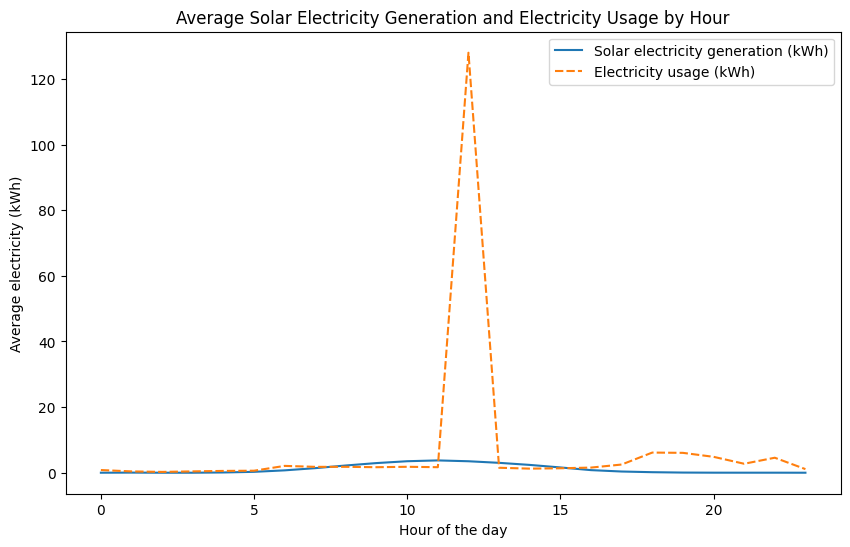

In [7]:
# Create a new column for the hour of the day that fills the "HOUR" column with the respective hour from the "Date/hour start" column
data['Hour'] = data['Date/hour start'].dt.hour

# Calculate average solar electricity generation and electricity usage for each hour
hourly_avg = data.groupby('Hour').mean()

# Plot the average solar electricity generation and electricity usage for each hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']])
plt.xlabel('Hour of the day')
plt.ylabel('Average electricity (kWh)')
plt.title('Average Solar Electricity Generation and Electricity Usage by Hour')
plt.show()

In [8]:
# Calculate the z-scores for solar electricity generation and electricity usage
data['Solar Generation Z-Score'] = (data['Solar electricity generation (kWh)'] - data['Solar electricity generation (kWh)'].mean()) / data['Solar electricity generation (kWh)'].std()
data['Electricity Usage Z-Score'] = (data['Electricity usage (kWh)'] - data['Electricity usage (kWh)'].mean()) / data['Electricity usage (kWh)'].std()

# Identify outliers based on a threshold (e.g., z-score > 3 or < -3)
outliers = data[(data['Solar Generation Z-Score'] > 3) | (data['Solar Generation Z-Score'] < -3) | (data['Electricity Usage Z-Score'] > 3) | (data['Electricity Usage Z-Score'] < -3)]

# Print the outliers
outliers


,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Solar Generation Z-Score,Electricity Usage Z-Score
276,12,2020-01-12 12:00:00,5.214,46000.000,2.022237,93.580014
1331,11,2020-02-25 11:00:00,7.431,0.048,3.116458,-0.014781
1739,11,2020-03-14 11:00:00,7.926,0.000,3.360770,-0.014879
1740,12,2020-03-14 12:00:00,7.512,0.000,3.156436,-0.014879
1786,10,2020-03-16 10:00:00,7.665,0.000,3.231951,-0.014879
...,...,...,...,...,...,...
6540,12,2020-09-30 12:00:00,8.175,2.889,3.483666,-0.009001
6586,10,2020-10-02 10:00:00,7.758,0.063,3.277852,-0.014751
6611,11,2020-10-03 11:00:00,7.335,0.297,3.069076,-0.014275
6659,11,2020-10-05 11:00:00,7.467,0.021,3.134226,-0.014836


## Outliers
Z-score is a standard score that is used to measure the deviation of an individual data point from the mean of distribution. It helps to easily identify outliers.

By calculating the z-score for each data point, we can identify outliers that fall outside a certain threshold, typically set at ±3 standard deviations. 

Data points with z-scores greater than 3 or less than -3 are considered significant outliers.

We notice a significant outlier at 12pm on 12th of January 2020 where over 46000KWh of electricity was consumed.

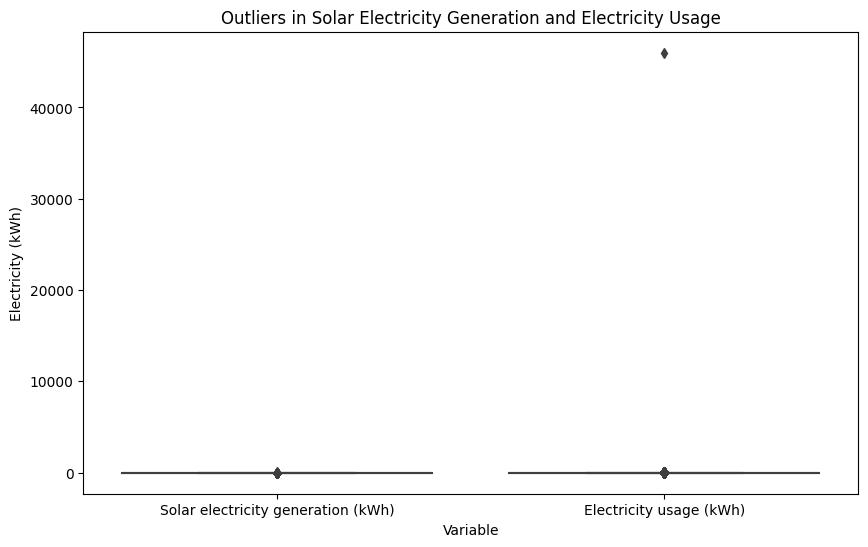

In [9]:
# Investigate outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']])
plt.xlabel('Variable')
plt.ylabel('Electricity (kWh)')
plt.title('Outliers in Solar Electricity Generation and Electricity Usage')
plt.show()

#### Winsorization to handle the outliers
Winsorizarion is a technique used to limit the impact of outliers by replacing the extreme values(the outliers) with a value closer to the rest of the data.

It includes setting a percentile/ threshold and choosing the values below or above the set threshold

In our dataset, we set the lower percentile at 0.01 and the highest at 0.99. This effectively limits the impact of the outliers to the dataset

In [10]:
### Winsorization to limit outliers to a certain percentile
data['Solar electricity generation (kWh)'] = data['Solar electricity generation (kWh)'].clip(lower=data['Solar electricity generation (kWh)'].quantile(0.01), upper=data['Solar electricity generation (kWh)'].quantile(0.99))
data['Electricity usage (kWh)'] = data['Electricity usage (kWh)'].clip(lower=data['Electricity usage (kWh)'].quantile(0.01), upper=data['Electricity usage (kWh)'].quantile(0.99))


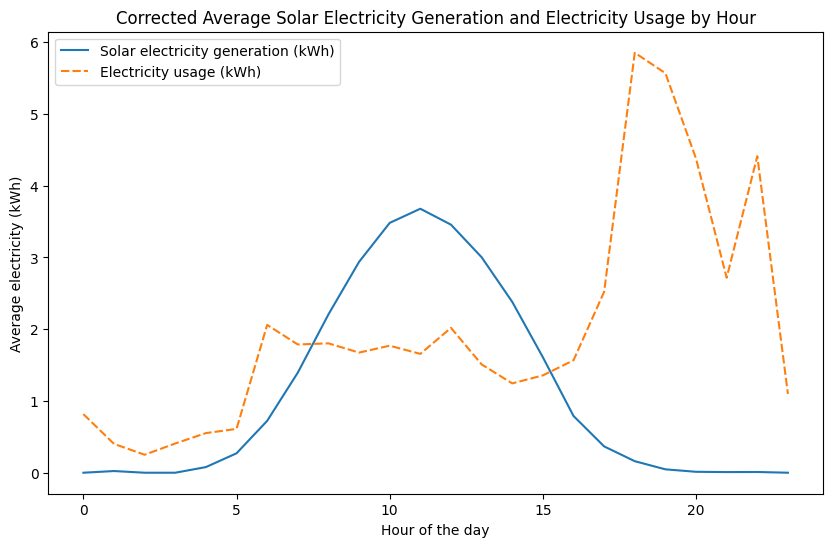

In [11]:
# Re-calculate average after outlier correction
hourly_avg_corrected = data.groupby('Hour').mean()

# Plot the corrected average solar electricity generation and electricity usage for each hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg_corrected[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']])
plt.xlabel('Hour of the day')
plt.ylabel('Average electricity (kWh)')
plt.title('Corrected Average Solar Electricity Generation and Electricity Usage by Hour')
plt.show()


### Question 2
(ii)	Calculate, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider (measured in kWh and subject to a minimum of zero).	

This code calculates the amount of electricity that needed to be bought from the electricity provider by subtracting the solar electricity generation from the electricity usage for each hour. The resulting values are then clipped to a minimum of zero to ensure that negative values (indicating excess solar electricity generation) are set to zero.

In [12]:
# Calculate the amount of electricity that needed to be bought from the electricity provider
data['Electricity bought (kWh)'] = data['Electricity usage (kWh)'] - data['Solar electricity generation (kWh)']
data['Electricity bought (kWh)'] = data['Electricity bought (kWh)'].clip(lower=0)

# Print the calculated values dataframe
data[['Date/hour start', 'Hour', 'Electricity bought (kWh)']]

,Date/hour start,Hour,Electricity bought (kWh)
0,2020-01-01 00:00:00,0,1.509849
1,2020-01-01 01:00:00,1,1.411859
2,2020-01-01 02:00:00,2,1.023898
3,2020-01-01 03:00:00,3,0.642000
4,2020-01-01 04:00:00,4,0.960000
...,...,...,...
8755,2020-12-31 19:00:00,19,4.383600
8756,2020-12-31 20:00:00,20,4.557600
8757,2020-12-31 21:00:00,21,2.022000
8758,2020-12-31 22:00:00,22,1.653000


### Question 3

(iii)	Calculate, for each hour in 2020, the excess solar electricity generated over electricity used (measured in kWh and subject to a minimum of zero).

This code calculates the excess solar electricity generated over electricity used by subtracting the electricity usage from the solar electricity generation for each hour. The resulting values are then clipped to a minimum of zero to ensure that negative values (indicating insufficient solar electricity generation) are set to zero.

In [13]:
# Calculate the excess solar electricity generated over electricity used
data['Excess solar electricity (kWh)'] = data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)']
# Print the calculated values higher than zero
data[data['Excess solar electricity (kWh)'] > 0][['Hour', 'Excess solar electricity (kWh)']]

,Hour,Excess solar electricity (kWh)
9,9,0.240
12,12,0.255
17,17,0.006
58,10,0.189
59,11,0.267
...,...,...
8723,11,0.123
8724,12,2.649
8725,13,0.129
8749,13,2.064


### Question 4

(iv)	Model the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.

The battery charge level should:

•	begin at zero at 1 January 2020 00:00.

•	allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).

•	be subject to the cap on the maximum battery charge level.


This code models the cumulative battery charge level for each hour over 2020. It initializes the battery charge level to zero and then iterates over each row in the dataset. For each hour, it calculates the excess solar electricity generated over electricity used and the amount of electricity bought from the electricity provider. It then updates the battery charge level by adding the excess solar electricity and subtracting the electricity bought, subject to the maximum battery charge level of 12.5 kWh. The resulting cumulative battery charge levels are stored in the cumulative_charge_level list.

In [14]:
# Set the initial battery charge level to zero
battery_charge_level = 0

# Create an empty list to store the cumulative battery charge level
cumulative_charge_level = []

# Iterate over each row in the dataset
for index, row in data.iterrows():
    # Calculate the excess solar electricity generated over electricity used for the current hour
    excess_solar_electricity = max(row['Solar electricity generation (kWh)'] - row['Electricity usage (kWh)'], 0)
    
    # Calculate the amount of electricity that needed to be bought from the electricity provider for the current hour
    electricity_bought = max(row['Electricity usage (kWh)'] - row['Solar electricity generation (kWh)'], 0)
    
    # Calculate the battery charge level for the current hour
    battery_charge_level = min(battery_charge_level + excess_solar_electricity - electricity_bought, 12.5)
    
    # Append the battery charge level to the cumulative_charge_level list
    cumulative_charge_level.append(battery_charge_level)

# Add the cumulative_charge_level list as a new column in the DataFrame
data['Cumulative battery charge level (kWh)'] = cumulative_charge_level

# Print the calculated values
data[['Date/hour start', 'Hour', 'Cumulative battery charge level (kWh)']]


,Date/hour start,Hour,Cumulative battery charge level (kWh)
0,2020-01-01 00:00:00,0,-1.509849
1,2020-01-01 01:00:00,1,-2.921708
2,2020-01-01 02:00:00,2,-3.945605
3,2020-01-01 03:00:00,3,-4.587605
4,2020-01-01 04:00:00,4,-5.547605
...,...,...,...
8755,2020-12-31 19:00:00,19,-7796.239143
8756,2020-12-31 20:00:00,20,-7800.796743
8757,2020-12-31 21:00:00,21,-7802.818743
8758,2020-12-31 22:00:00,22,-7804.471743


### Question 5
(v)	Calculate the amount of electricity for each hour in 2020 that would have been bought from the electricity provider (measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.

This code calculates the amount of electricity that would have been bought from the electricity provider for each hour in 2020, assuming a battery had already been installed. It initializes the battery charge level to zero and then iterates over each row in the dataset. For each hour, it calculates the excess solar electricity generated over electricity used and the amount of electricity that needed to be bought from the electricity provider. It updates the battery charge level based on the excess solar electricity, the electricity bought, and the maximum battery charge level of 12.5 kWh. The resulting amounts of electricity bought are stored in the electricity_bought list.

In [15]:
# Set the initial battery charge level to zero
battery_charge_level = 0

# Create an empty list to store the electricity bought from the electricity provider
electricity_bought = []

# Iterate over each row in the dataset
for index, row in data.iterrows():
    # Calculate the excess solar electricity generated over electricity used for the current hour
    excess_solar_electricity = max(row['Solar electricity generation (kWh)'] - row['Electricity usage (kWh)'], 0)
    
    # Calculate the amount of electricity that needed to be bought from the electricity provider for the current hour
    electricity_to_buy = max(row['Electricity bought (kWh)'] + battery_charge_level, 0)
    
    # Update the battery charge level for the next hour
    battery_charge_level = min(battery_charge_level + excess_solar_electricity - electricity_to_buy, 12.5)
    
    # Append the amount of electricity bought to the electricity_bought list
    electricity_bought.append(electricity_to_buy)

# Add the electricity_bought list as a new column in the DataFrame
data['Electricity bought (kWh)'] = electricity_bought

# Print the calculated values
data[['Date/hour start', 'Hour', 'Electricity bought (kWh)']]


,Date/hour start,Hour,Electricity bought (kWh)
0,2020-01-01 00:00:00,0,1.509849
1,2020-01-01 01:00:00,1,0.000000
2,2020-01-01 02:00:00,2,0.000000
3,2020-01-01 03:00:00,3,0.000000
4,2020-01-01 04:00:00,4,0.000000
...,...,...,...
8755,2020-12-31 19:00:00,19,0.000000
8756,2020-12-31 20:00:00,20,0.000000
8757,2020-12-31 21:00:00,21,0.000000
8758,2020-12-31 22:00:00,22,0.000000


### Question 6
(vi)	Calculate the saving over 2020 (in dollars ($), using 1 January 2022 electricity prices and ignoring discounting) from installing a battery compared to using the existing solar panels alone.

The code calculates the excess electricity generated by the solar panels and stored in the battery by subtracting the electricity usage from the solar electricity generation. It also calculates the electricity bought from the electricity provider by subtracting the solar electricity generation from the electricity usage. The savings are then calculated by multiplying the difference between the electricity bought and the excess solar electricity by the electricity price for 2022. Finally, the total savings over 2020 are calculated by summing up the savings for each hour.

In [16]:
# Set the electricity prices for 2022
electricity_price_2022 = 0.17  # Replace with the actual electricity price for 2022 in dollars per kWh

# Calculate the excess electricity generated by the solar panels and stored in the battery
data['Excess solar electricity (kWh)'] = data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)']
data['Excess solar electricity (kWh)'] = data['Excess solar electricity (kWh)'].clip(lower=0)

# Calculate the electricity bought from the electricity provider
data['Electricity bought (kWh)'] = data['Electricity usage (kWh)'] - data['Solar electricity generation (kWh)']
data['Electricity bought (kWh)'] = data['Electricity bought (kWh)'].clip(lower=0)

# Calculate the savings from installing a battery compared to using the existing solar panels alone
savings = (data['Electricity bought (kWh)'] - data['Excess solar electricity (kWh)']) * electricity_price_2022

# Calculate the total savings over 2020
total_savings = savings.sum()

# Print the total savings
print("Total savings over 2020: $", total_savings)


Total savings over 2020: $ 1326.897202676


### Question 7
(vii)	Tabulate the data appropriately and then produce a chart to illustrate, on a monthly basis for the calendar year and measured in kWh, the:

•	monthly solar generation.

•	monthly electricity usage.

•	monthly electricity purchased from the electricity provider (no battery).

•	monthly electricity purchased from the electricity provider (with battery).


In [17]:
# Convert the 'Date/hour start' column to datetime format
data['Date/hour start'] = pd.to_datetime(data['Date/hour start'])

# Extract the month from the 'Date/hour start' column
data['Month'] = data['Date/hour start'].dt.month
# Calculate the monthly solar generation
monthly_solar_generation = data.groupby('Month')['Solar electricity generation (kWh)'].sum()
# Calculate the monthly electricity usage
monthly_electricity_usage = data.groupby('Month')['Electricity usage (kWh)'].sum()
# Calculate the monthly electricity purchased from the provider (without battery)
monthly_electricity_from_provider_no_battery = data.groupby('Month')['Electricity usage (kWh)'].sum() - data.groupby('Month')['Solar electricity generation (kWh)'].sum()

# Calculate the monthly electricity purchased from the provider (with battery)
battery_charge = 0
max_battery_charge = 12.5
monthly_electricity_from_provider_with_battery = []

# Iterate over each month
for month in range(1, 13):
    month_data = data[data['Month'] == month]
    battery_charge = 0
    electricity_from_provider_with_battery = 0
    
    # Iterate over each hour in the month
    for index, row in month_data.iterrows():
        excess_generation = row['Solar electricity generation (kWh)'] - row['Electricity usage (kWh)']
        
        # Check if there is excess generation to charge the battery
        if excess_generation > 0:
            # Calculate the new battery charge level
            battery_charge = min(battery_charge + excess_generation, max_battery_charge)
        
        # Calculate the electricity from the provider
        electricity_from_provider = max(row['Electricity usage (kWh)'] - battery_charge, 0)
        electricity_from_provider_with_battery += electricity_from_provider
    
    monthly_electricity_from_provider_with_battery.append(electricity_from_provider_with_battery)
    
    

In [18]:
monthly_data = pd.DataFrame({
    'Month': range(1,13),
    'Solar Generation (KWh)': monthly_solar_generation.values,
    'Electricity Usage(KWh)': monthly_electricity_usage.values,
    'Electricity from Provider (No Battery) (KWh)': monthly_electricity_from_provider_no_battery.values,
    'Electricity from provider (With Battery)(KWh)': monthly_electricity_from_provider_with_battery
})

monthly_data.set_index('Month', inplace=True)

print(monthly_data)

       Solar Generation (KWh)  Electricity Usage(KWh)  \
Month                                                   
1                   266.25900             1722.634841   
2                   449.63400             1520.759510   
3                   600.32238             1697.581870   
4                   907.10784             1671.404467   
5                  1629.14937              945.439949   
6                  1393.47960             1158.386298   
7                  1357.65114             1190.215881   
8                  1153.98753             1436.736291   
9                   832.49238             1604.144625   
10                  546.13200             1370.965445   
11                  381.72300             1425.098329   
12                  205.96500             1785.813395   

       Electricity from Provider (No Battery) (KWh)  \
Month                                                 
1                                       1456.375841   
2                                   

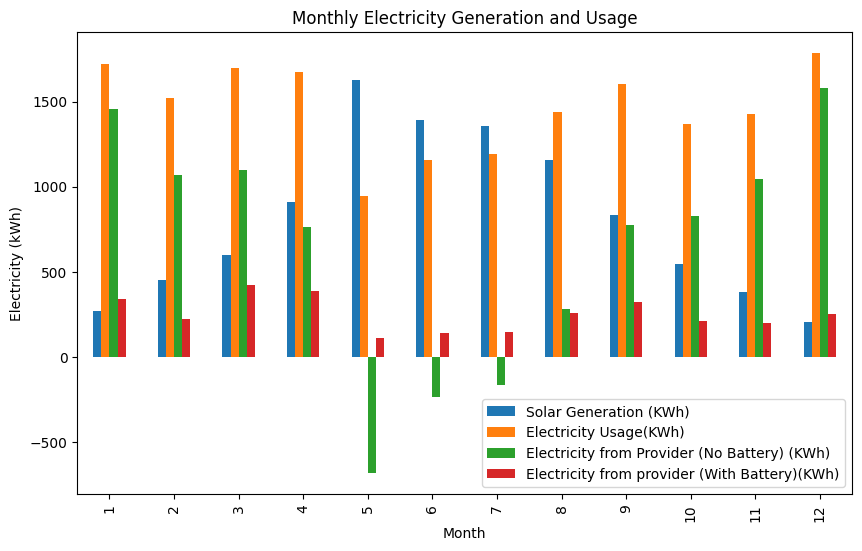

In [19]:
# Plot the monthly data
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Electricity (kWh)')
plt.title('Monthly Electricity Generation and Usage')
plt.legend()
plt.show()


### Question 8
(viii)	(a)	Project forward for 20 years from 1 January 2022 the annual savings from installing the battery for the two scenarios below.

(b)	For the two scenarios, calculate the Net Present Value (NPV) of the future annual savings.

The scenarios are as follows:

1.	Electricity prices increase as expected by the government, 4% p.a.
2.	Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.


In [20]:
# Calculate excess solar electricity and stored electricity for each hour
data['Excess Solar Electricity'] = data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)']
data['Stored Electricity'] = data['Excess Solar Electricity'].clip(lower=0, upper=12.5)

# Calculate the total extra electricity that could be met from the solar panel and battery combination
total_extra_electricity = data['Stored Electricity'].sum()##==7270.170351599999

# Calculate the implied dollar savings in electricity costs
electricity_price = 0.17
implied_dollar_savings = (data['Stored Electricity'] * electricity_price).sum()
discount_rate = 0.06

In [21]:
annual_savings_scenario1 = []
electricity_price_increase_scenario1 = 0.04
for year in range(2022, 2042):
    annual_savings_scenario1.append(implied_dollar_savings)
    implied_dollar_savings *= (1 + electricity_price_increase_scenario1)

# Print the annual savings for each scenario
print("Scenario 1: Annual Savings")
for year, savings in zip(range(2022, 2042), annual_savings_scenario1):
    print(f"Year {year}: ${savings:.2f}")

# Calculate the NPV for scenario 1
npv_scenario1 = sum([savings / (1 + discount_rate) ** (year - 2022) for year, savings in zip(range(2022, 2042), annual_savings_scenario1)])
print("\nScenario 1: NPV")
print(f"${npv_scenario1:.2f}")

Scenario 1: Annual Savings
Year 2022: $1235.93
Year 2023: $1285.37
Year 2024: $1336.78
Year 2025: $1390.25
Year 2026: $1445.86
Year 2027: $1503.70
Year 2028: $1563.84
Year 2029: $1626.40
Year 2030: $1691.45
Year 2031: $1759.11
Year 2032: $1829.48
Year 2033: $1902.66
Year 2034: $1978.76
Year 2035: $2057.91
Year 2036: $2140.23
Year 2037: $2225.84
Year 2038: $2314.87
Year 2039: $2407.47
Year 2040: $2503.77
Year 2041: $2603.92

Scenario 1: NPV
$20751.57


In [22]:
# Scenario 2: Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a.
annual_savings_scenario2 = []
electricity_price_increase_scenario2 = 0.04
additional_price_increase_scenario2 = 0.0025
for year in range(2022, 2042):
    annual_savings_scenario2.append(implied_dollar_savings)
    electricity_price_increase_scenario2 += additional_price_increase_scenario2
    implied_dollar_savings *= (1 + electricity_price_increase_scenario2)
print("\nScenario 2: Annual Savings")
for year, savings in zip(range(2022, 2042), annual_savings_scenario2):
    print(f"Year {year}: ${savings:.2f}")

# Calculate the NPV for scenario 2
npv_scenario2 = sum([savings / (1 + discount_rate) ** (year - 2022) for year, savings in zip(range(2022, 2042), annual_savings_scenario2)])
# Print the NPV for each scenario
print("\nScenario 2: NPV")
print(f"${npv_scenario2:.2f}")



Scenario 2: Annual Savings
Year 2022: $2708.07
Year 2023: $2823.17
Year 2024: $2950.21
Year 2025: $3090.34
Year 2026: $3244.86
Year 2027: $3415.22
Year 2028: $3603.05
Year 2029: $3810.23
Year 2030: $4038.84
Year 2031: $4291.27
Year 2032: $4570.20
Year 2033: $4878.69
Year 2034: $5220.20
Year 2035: $5598.66
Year 2036: $6018.56
Year 2037: $6485.00
Year 2038: $7003.80
Year 2039: $7581.61
Year 2040: $8226.05
Year 2041: $8945.83

Scenario 2: NPV
$52982.51


### Question 9
(ix)	Calculate the Internal Rate of Return (IRR) for the two scenarios in part (viii) by determining the discount rate that equates the net present value of the future annual savings to the initial cost of the battery for each scenario.	

[Note: All scenarios outlined above should be modelled separately in your model. The user should not need to change the parameters to see the results.]


In [23]:
# Initial cost of the battery
battery_cost = 7000

# Function to calculate the NPV for a given discount rate and annual savings
def calculate_npv(discount_rate, annual_savings):
    return sum([savings / (1 + discount_rate) ** (year - 2022) for year, savings in zip(range(2022, 2042), annual_savings)]) - battery_cost


In [24]:
# Scenario 1: Calculate the IRR
irr_scenario1 = fsolve(calculate_npv, 0.06, args=(annual_savings_scenario1,))[0]
# Print the IRR for each scenario
print("Scenario 1: IRR")
print(f"{irr_scenario1 * 100:.2f}%")

Scenario 1: IRR
25.69%


In [25]:
# Scenario 2: Calculate the IRR
irr_scenario2 = fsolve(calculate_npv, 0.06, args=(annual_savings_scenario2,))[0]
print("\nScenario 2: IRR")
print(f"{irr_scenario2 * 100:.2f}%")


Scenario 2: IRR
70.67%
